<a href="https://colab.research.google.com/github/Aman-7745/Statistics/blob/main/prob_Dist_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import random

In [4]:
L =[]
for i in range(1000):
  L.append(random.randint(1,6))


In [5]:
len(L)

1000

In [7]:
L[:5]

[1, 3, 5, 2, 2]

In [18]:
p = pd.Series(L)

In [19]:
p

,0
0,1
1,3
2,5
3,2
4,2
...,...
995,6
996,4
997,1
998,4


In [23]:
pd.Series(L).value_counts()

,count
4,189
1,168
6,166
2,164
3,161
5,152


In [24]:
pd.Series(L).value_counts().sum()

np.int64(1000)

In [16]:
s =(pd.Series(L).value_counts()/pd.Series(L).value_counts().sum())

In [17]:
s

,count
4,0.189
1,0.168
6,0.166
2,0.164
3,0.161
5,0.152


<Axes: >

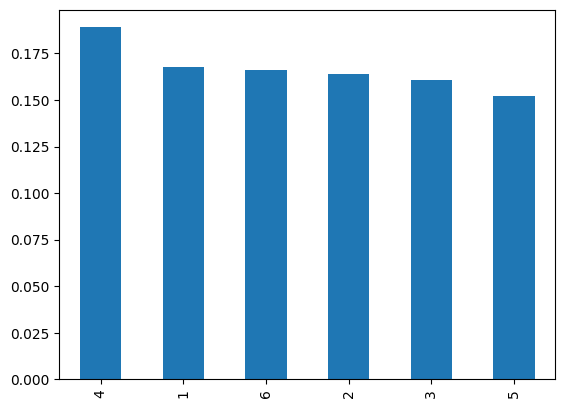

In [25]:
s.plot(kind='bar')

# Probability Density Estimation

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

sample = normal(loc =50, scale =5, size =1000)


(array([ 3.,  2.,  3.,  2.,  8.,  7., 11., 16., 15., 10., 23., 20., 32.,
        29., 33., 46., 43., 43., 36., 43., 48., 48., 40., 40., 55., 44.,
        41., 39., 37., 26., 23., 29., 19., 20., 13., 15.,  8.,  8.,  7.,
         4.,  3.,  2.,  2.,  1.,  0.,  1.,  0.,  0.,  1.,  1.]),
 array([36.75645222, 37.3597265 , 37.96300077, 38.56627505, 39.16954933,
        39.77282361, 40.37609788, 40.97937216, 41.58264644, 42.18592071,
        42.78919499, 43.39246927, 43.99574354, 44.59901782, 45.2022921 ,
        45.80556638, 46.40884065, 47.01211493, 47.61538921, 48.21866348,
        48.82193776, 49.42521204, 50.02848631, 50.63176059, 51.23503487,
        51.83830914, 52.44158342, 53.0448577 , 53.64813198, 54.25140625,
        54.85468053, 55.45795481, 56.06122908, 56.66450336, 57.26777764,
        57.87105191, 58.47432619, 59.07760047, 59.68087475, 60.28414902,
        60.8874233 , 61.49069758, 62.09397185, 62.69724613, 63.30052041,
        63.90379468, 64.50706896, 65.11034324, 65.71361751,

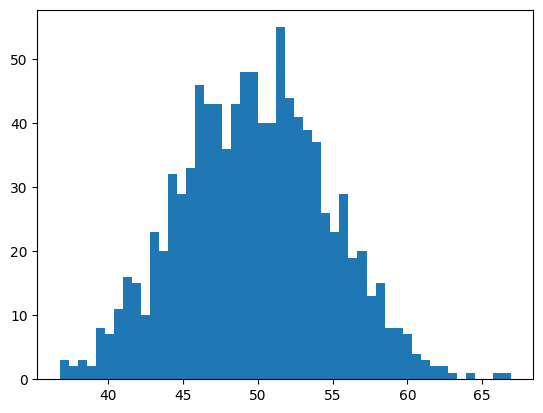

In [32]:
plt.hist(sample, bins =50)

In [33]:
sample_mean = sample.mean()
sample_std = sample.std()

In [34]:
sample_std

np.float64(4.9542711439049345)

In [35]:
from scipy.stats import norm
dist = norm(60,12)

In [37]:
sample.max()

np.float64(66.92016606878654)

In [38]:
values = np.linspace(sample.min(), sample.max(), 100)

In [39]:
prob= [dist.pdf(values) for value in values]